# Entrega 5

In [72]:
import torch 
from torch.autograd import Variable
from sklearn.metrics import f1_score
#---
from glob import glob 
#---
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')


from PIL import Image

In [73]:
#!unzip mnist.zip

In [74]:
train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')

np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

In [75]:
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
  Y_train.append( int(train_file.split('/')[3]) )
  X_train.append(np.array(Image.open(train_file)))


N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
  Y_valid.append( int(valid_file.split('/')[3]) )
  X_valid.append( np.array(Image.open(valid_file)) )

N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
  Y_test.append( int(test_file.split('/')[3]) )
  X_test.append( np.array(Image.open(test_file)) )

  len(X_train), len(X_valid), len(X_test)

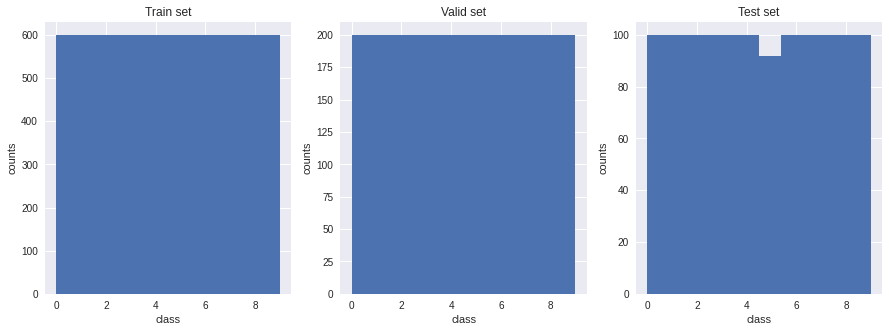

In [76]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(np.sort(Y_train))
plt.xlabel('class')
plt.ylabel('counts')
plt.title('Train set')

plt.subplot(1,3,2)
plt.hist(np.sort(Y_valid))
plt.xlabel('class')
plt.ylabel('counts')
plt.title('Valid set')

plt.subplot(1,3,3)
plt.hist(np.sort(Y_test))
plt.xlabel('class')
plt.ylabel('counts')
plt.title('Test set')

plt.show()

In [77]:
X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [78]:
percentages = [0.1,0.2,0.5,0.8,1]
len(X_train)

6000

In [127]:
#--- Modelo
imput_dim = 28*28
out_dim = 10
hidden = 50
model = torch.nn.Sequential(
    torch.nn.Linear(imput_dim,hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden,hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden,out_dim)
)

optimizer =  torch.optim.Adam(model.parameters())
criterion =  torch.nn.CrossEntropyLoss()

def percentage_train(per): 
  #Epocas
  n_epoch = 100
  #Entenamiento
  loss_train = []
  f1_train = []
  acc_train = []
  #Validación
  loss_valid = []
  f1_valid = []
  acc_valid = []
  # Datos parciales
  X_train_partial= X_train[0:int(len(X_train)*per)]
  Y_train_partial= Y_train[0:int(len(X_train)*per)]

  for epoch in range(n_epoch):


    model.train()
    
    Xtr = X_train_partial.view(X_train_partial.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train_partial)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train_partial,Y_pred, average='macro') )
    
    acc = sum(Y_train_partial == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)
  
  fig = plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  plt.plot(range(n_epoch), loss_train, label='train')
  plt.plot(range(n_epoch), loss_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('loss')
  plt.title('loss',fontsize=15)
  plt.legend()

  plt.subplot(1,3,2)
  plt.plot(range(n_epoch), f1_train, label='train')
  plt.plot(range(n_epoch), f1_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('f1_score')
  plt.title('f1_score',fontsize=15)
  plt.legend()

  plt.subplot(1,3,3)
  plt.plot(range(n_epoch), acc_train, label='train')
  plt.plot(range(n_epoch), acc_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('accuracy')
  plt.title('accuracy',fontsize=15)
  plt.legend()

  fig.suptitle('Curvas para un porcentaje de datos de {}% '.format(per*100),fontsize=20)
  plt.show()
  model.eval()

  Xts = X_test.view(X_test.size(0), -1)
  Y_pred = model(Xts)  
  loss = criterion(Y_pred,Y_test)

  Y_pred = torch.argmax(Y_pred, 1)
  f1 = f1_score(Y_test, Y_pred, average='macro')

  acc = sum(Y_test == Y_pred)/len(Y_pred)

  print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))
  print('------------------------------------------------------------------------------------------------------------------')
  return(loss.item(), f1, acc)

Curvas para un porcentaje de datos de 10.0% 


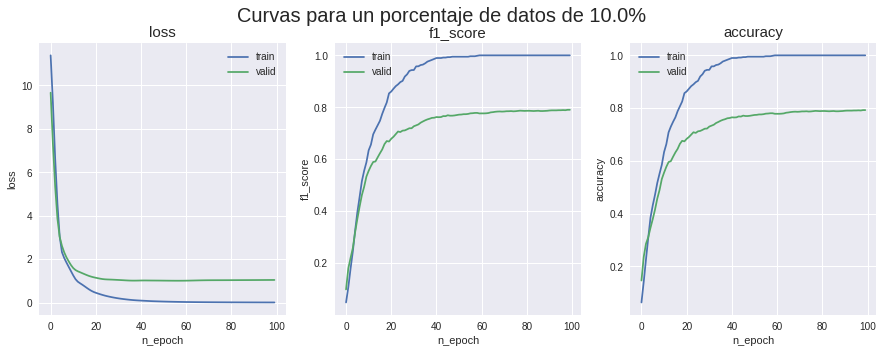

loss: 0.9498094916343689, f1: 0.7854385894178293, acc: 0.7903226017951965
------------------------------------------------------------------------------------------------------------------
Curvas para un porcentaje de datos de 20.0% 


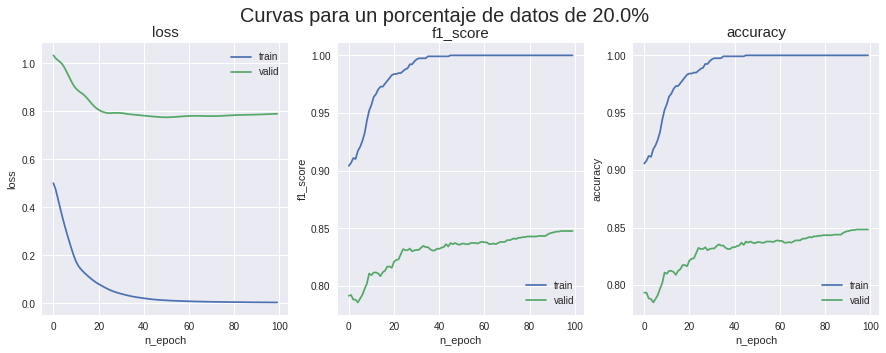

loss: 0.7787004113197327, f1: 0.8445949223823715, acc: 0.8467742204666138
------------------------------------------------------------------------------------------------------------------
Curvas para un porcentaje de datos de 50.0% 


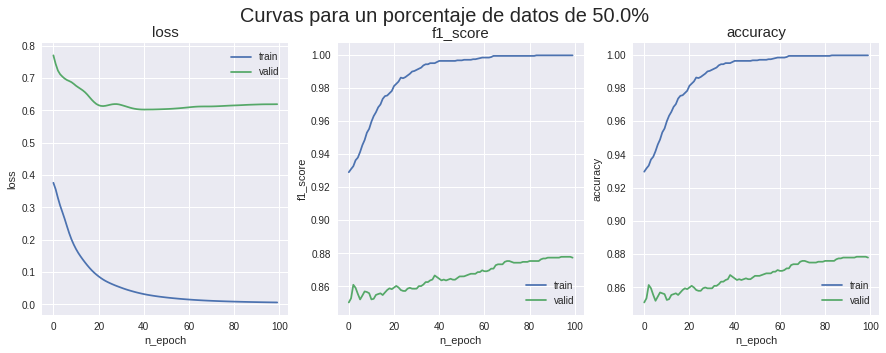

loss: 0.6495041251182556, f1: 0.8830161947115303, acc: 0.8830645084381104
------------------------------------------------------------------------------------------------------------------
Curvas para un porcentaje de datos de 80.0% 


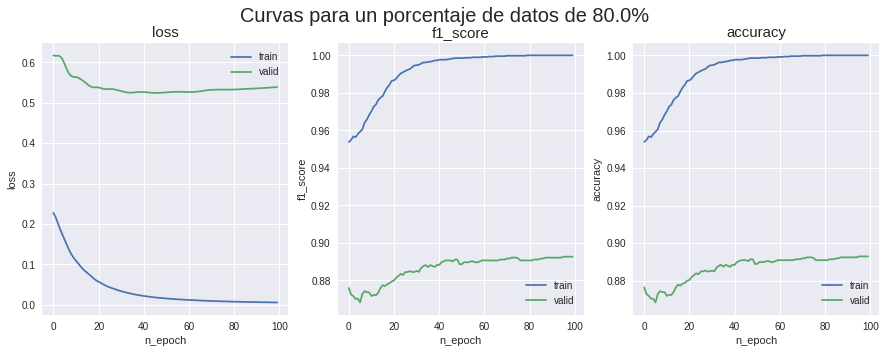

loss: 0.4430809020996094, f1: 0.9108940405441397, acc: 0.9112903475761414
------------------------------------------------------------------------------------------------------------------
Curvas para un porcentaje de datos de 100% 


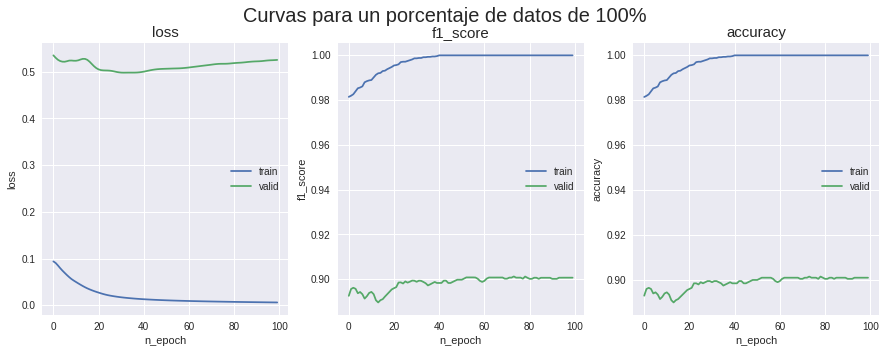

loss: 0.40396884083747864, f1: 0.9105150530147729, acc: 0.9112903475761414
------------------------------------------------------------------------------------------------------------------


In [128]:
loss_per = []
f1_per = []
accuracy_per =[]
for i in percentages:

  print( 'Curvas para un porcentaje de datos de {}% '.format(i*100) )
  a,b,c= percentage_train(i)
  loss_per.append(a)
  f1_per.append(b)
  accuracy_per.append(c)

<function matplotlib.pyplot.show>

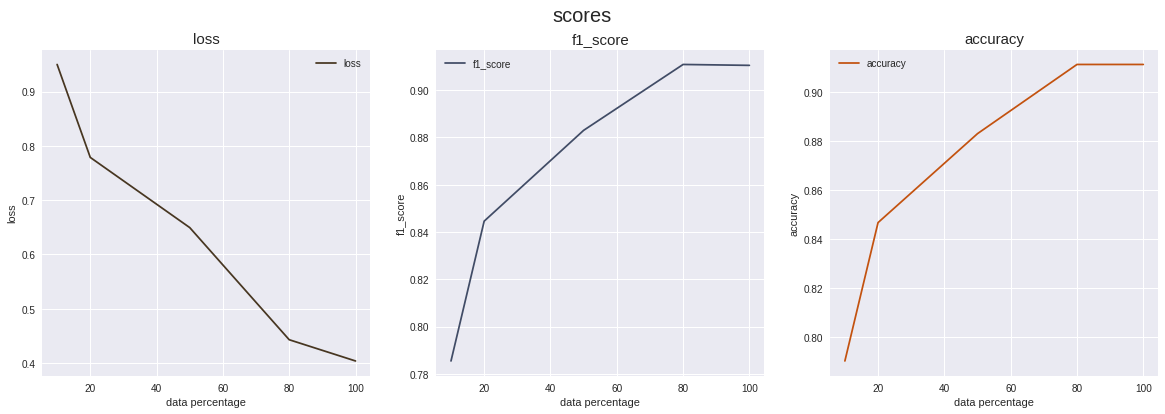

In [139]:
fig = plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(np.array(percentages)*100, loss_per, label='loss',color=np.random.rand(3,))
plt.ylabel('loss')
plt.xlabel('data percentage')
plt.title('loss',fontsize=15)
plt.legend()

plt.subplot(1,3,2)
plt.plot(np.array(percentages)*100, f1_per, label='f1_score',color= np.random.rand(3,))
plt.ylabel('f1_score')
plt.xlabel('data percentage')
plt.title('f1_score',fontsize=15)
plt.legend()


plt.subplot(1,3,3)
plt.plot(np.array(percentages)*100, accuracy_per, label='accuracy',color=np.random.rand(3,))
plt.ylabel('accuracy')
plt.xlabel('data percentage')
plt.title('accuracy',fontsize=15)
plt.legend()

fig.suptitle('scores',fontsize=20)
plt.show


Es posible observar  en las gráficas como a medida que se aumeta la cantidad de datos las perdidas (loss) tienden a disminuir, el score de modelo (f1_score) aumenta y la exactidud aumenta. esta tresa variables entonces incicada como era de esperarse que con mayor número de datos mejor se entrena el modelo. 

* El codigo esta basado en el material de la clase, el cual se puede encontrar en:
https://github.com/ComputoCienciasUniandes/IntroDeepLearning_202102/blob/main/notebooks/09_Entrenamiento_Validaci%C3%B3n_Testeo.ipynb


In [137]:
np.array(percentages)*100

array([ 10.,  20.,  50.,  80., 100.])